# 1 import packages

In [487]:
# to bring the NumPy library into current environment. 
# this allows to use NumPy functions
import numpy as np

# to bring the pandas functionality into current environment. 
import pandas as pd

# allows users to create numerous and diverse plot types
import matplotlib.pyplot as plt

# model selection for splitting data arrays into two subsets
from sklearn.model_selection import train_test_split

# to measure classification performance
from sklearn import metrics

# used for evaluating the performance of a classification model
from sklearn.metrics import classification_report, confusion_matrix

# 2 Import dataset

In [488]:
#import dataset to data frame using pandas function and define as df_raisin 
df_raisin = pd.read_csv('Raisin_Dataset.csv')

# to displays the first five rows of the dataframe by default
df_raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


# 3 Data preprocessing

In [489]:
# replace category value in the form of strings to numerical 
df_raisin['Class'].replace(['Kecimen', 'Besni'],
                        [0, 1], inplace=True)

In [490]:
df_raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [491]:
# split dataset in features and target variable

X = df_raisin.drop(['Class'],axis=1).values  # features variable
y = df_raisin['Class'].values                # target variable

# split dataset into training set and test set using train_test_spit func
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 100)

In [513]:
# check missing value 

df_raisin.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

# 4. Performing Decision Tree using scikit learn

In [587]:
# import classifier decision tree algorithm 
from sklearn.tree import DecisionTreeClassifier

# create Decision Tree classifier object
clf = DecisionTreeClassifier()

# train model using Decision Tree Classifier
clf = clf.fit(X_train,y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

In [588]:
# evaluate the performance of model using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       143
           1       0.73      0.87      0.79       127

    accuracy                           0.79       270
   macro avg       0.79      0.79      0.78       270
weighted avg       0.80      0.79      0.78       270



In [589]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.7851851851851852
F1 score: 0.7928571428571429
Recall: 0.8740157480314961
Precision: 0.7254901960784313


# K-fold Validation

In [590]:
# implement cross validation to improve accuracy performance of model
from sklearn.model_selection import cross_val_score

# tune the hyperparameter of DecisionTree with max_depth and cv of 10
dt_scores = cross_val_score(DecisionTreeClassifier(max_depth=3),X_train, y_train, cv=10)
dt_scores

array([0.87301587, 0.82539683, 0.9047619 , 0.80952381, 0.88888889,
       0.82539683, 0.80952381, 0.77777778, 0.87301587, 0.88888889])

In [591]:
# print the mean score of 10-fold validation
print(np.mean(dt_scores))

0.8476190476190476


In [592]:
# train the model using classfier with hyperparameter
clf_val = DecisionTreeClassifier(max_depth=3)
clf_val = clf_val.fit(X_train,y_train)
clf_val.score(X_test, y_test)
y_prediction = clf_val.predict(X_test)

In [593]:
# evaluate the performance of model using classification report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       143
           1       0.85      0.89      0.87       127

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.88      0.87      0.87       270



In [594]:
# print confusion matrix
print(confusion_matrix(y_test, y_prediction))

[[123  20]
 [ 14 113]]


In [595]:
print('Accuracy:', accuracy_score(y_test, y_prediction))
print('F1 score:', f1_score(y_test, y_prediction))
print('Recall:', recall_score(y_test, y_prediction))
print('Precision:', precision_score(y_test, y_prediction))

Accuracy: 0.8740740740740741
F1 score: 0.8692307692307691
Recall: 0.889763779527559
Precision: 0.849624060150376


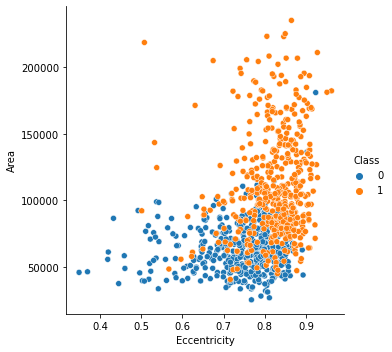

In [557]:
import seaborn as sns
sns.relplot(x='Eccentricity', y='Area', hue='Class', data=df_raisin);

# 5. Performing kNN using scikit learn

In [602]:
# import classifier kNN algorithm 
from sklearn.neighbors import KNeighborsClassifier

# create kNN classifier object
knn = KNeighborsClassifier(n_neighbors = 3) 
# this examines 3 neighbors when putting i the element into a class

# train model using kNN Classifier/ fit the model
knn = knn.fit(X_train, y_train)

# make predictions on the test data
prediction = clf.predict(X_test)

In [603]:
# evaluate the performance of model using classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       143
           1       0.73      0.87      0.79       127

    accuracy                           0.79       270
   macro avg       0.79      0.79      0.78       270
weighted avg       0.80      0.79      0.78       270



In [604]:
print('Accuracy:', accuracy_score(y_test, prediction))
print('F1 score:', f1_score(y_test, prediction))
print('Recall:', recall_score(y_test, prediction))
print('Precision:', precision_score(y_test, prediction))

Accuracy: 0.7851851851851852
F1 score: 0.7928571428571429
Recall: 0.8740157480314961
Precision: 0.7254901960784313


# K-fold Validation

In [605]:
# implement cross validation to improve accuracy performance of model
from sklearn.model_selection import cross_val_score

# tune the parameter of kNN with n_neighbors, metric and cv of 10
knn_scores = cross_val_score(KNeighborsClassifier(n_neighbors = 7, metric='minkowski'),X_train, y_train, cv=10)
knn_scores

array([0.85714286, 0.79365079, 0.88888889, 0.80952381, 0.9047619 ,
       0.76190476, 0.77777778, 0.79365079, 0.85714286, 0.82539683])

In [606]:
# print the mean score of 10-fold validation
print(np.mean(knn_scores))

0.8269841269841269


In [607]:
# train the model using classfier with hyperparameter
knn_val = KNeighborsClassifier(n_neighbors = 7, metric='minkowski')
knn_val = knn_val.fit(X_train,y_train)
knn_val.score(X_test, y_test)
y_p = knn_val.predict(X_test)

In [608]:
# evaluate the performance of model using classification report
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       143
           1       0.84      0.78      0.81       127

    accuracy                           0.83       270
   macro avg       0.83      0.82      0.82       270
weighted avg       0.83      0.83      0.83       270



In [609]:
# print confusion matrix
print(confusion_matrix(y_test, y_p))

[[124  19]
 [ 28  99]]


In [610]:
print('Accuracy:', accuracy_score(y_test, y_p))
print('F1 score:', f1_score(y_test, y_p))
print('Recall:', recall_score(y_test, y_p))
print('Precision:', precision_score(y_test, y_p))

Accuracy: 0.825925925925926
F1 score: 0.8081632653061225
Recall: 0.7795275590551181
Precision: 0.8389830508474576
